In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Import the datast useing pandas
df = pd.read_csv("Amaazon_sales_data\amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [20]:
import re
 # Functon to clean
def clean_numeric(column):
    return(
        df[column]
        .astype(str)
        .apply(lambda x: re.sub(r'[^\d.]','',x))
        .replace('','0').
        astype(float)) 
    
col_to_convert =['discounted_price','actual_price','discount_percentage','rating','rating_count']

for col in col_to_convert:
    df[col] =clean_numeric(col)

df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [21]:
df.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.00,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.00,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.00,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,149.00,1000.0,85.0,3.9,24871.0,Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,176.63,499.0,65.0,4.1,15188.0,It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images

In [22]:
df.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

In [23]:
# Summury statistics of numerical column
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.093788,18270.564505
std,6944.304394,10874.826864,21.635905,0.310598,42729.995315
min,39.000000,39.000000,0.000000,0.000000,0.000000
25%,325.000000,800.000000,32.000000,4.000000,1173.000000
50%,799.000000,1650.000000,50.000000,4.100000,5178.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [24]:
# Count of product per category
df['category'].value_counts()

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          233
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles                                             

<function matplotlib.pyplot.show(close=None, block=None)>

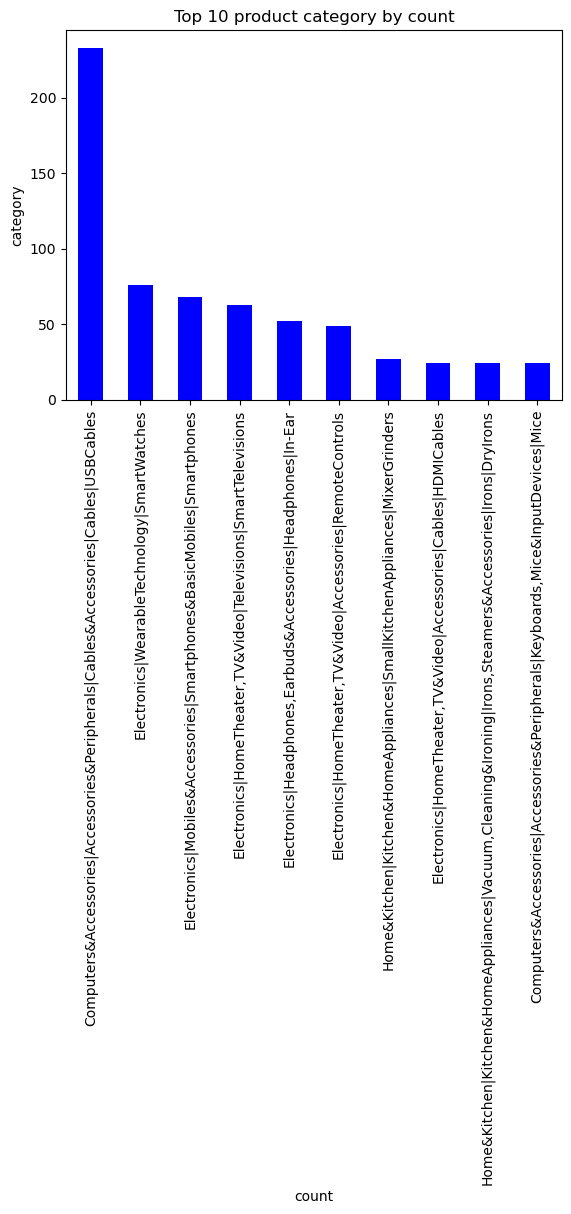

In [25]:
# Vizualization
plt.figsize=(12,6)
df['category'].value_counts().head(10).plot(kind='bar',color= 'blue',title= 'Top 10 product category by count')
plt.xlabel('count')
plt.ylabel('category')
plt.show


In [26]:
# Average discount per category
df.groupby('category')['discount_percentage'].mean().sort_values(ascending =False)

category
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                 90.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                          90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                  90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                 88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers       87.5
                                                                                                                    ... 
OfficeProducts|OfficeElectronics|Calculators|Basic                                                                   0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories|StandMixerAccessories     0.0
Electronics|HomeAudio|M

In [27]:
# Average rating per category
df.groupby('category')['rating'].mean().sort_values(ascending =False)

category
Computers&Accessories|Tablets                                                                                    4.60
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.50
Electronics|Cameras&Photography|Accessories|Film                                                                 4.50
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.50
OfficeProducts|OfficeElectronics|Calculators|Basic                                                               4.50
                                                                                                                 ... 
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                  3.50
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Clea

### Best and worst product based on rating

,product_name,category,rating,rating_count
1145,Swiffer Instant Electric Water Heater Faucet T...,"Home&Kitchen|Heating,Cooling&AirQuality|WaterH...",4.8,53803.0
820,Redgear MP35 Speed-Type Gaming Mousepad (Black...,Computers&Accessories|Accessories&Peripherals|...,4.6,33434.0
447,Spigen EZ Fit Tempered Glass Screen Protector ...,Electronics|Mobiles&Accessories|MobileAccessor...,4.6,26603.0
886,"Logitech M331 Silent Plus Wireless Mouse, 2.4G...",Computers&Accessories|Accessories&Peripherals|...,4.6,12375.0
964,Logitech G402 Hyperion Fury USB Wired Gaming M...,Computers&Accessories|Accessories&Peripherals|...,4.6,10760.0


<function matplotlib.pyplot.show(close=None, block=None)>

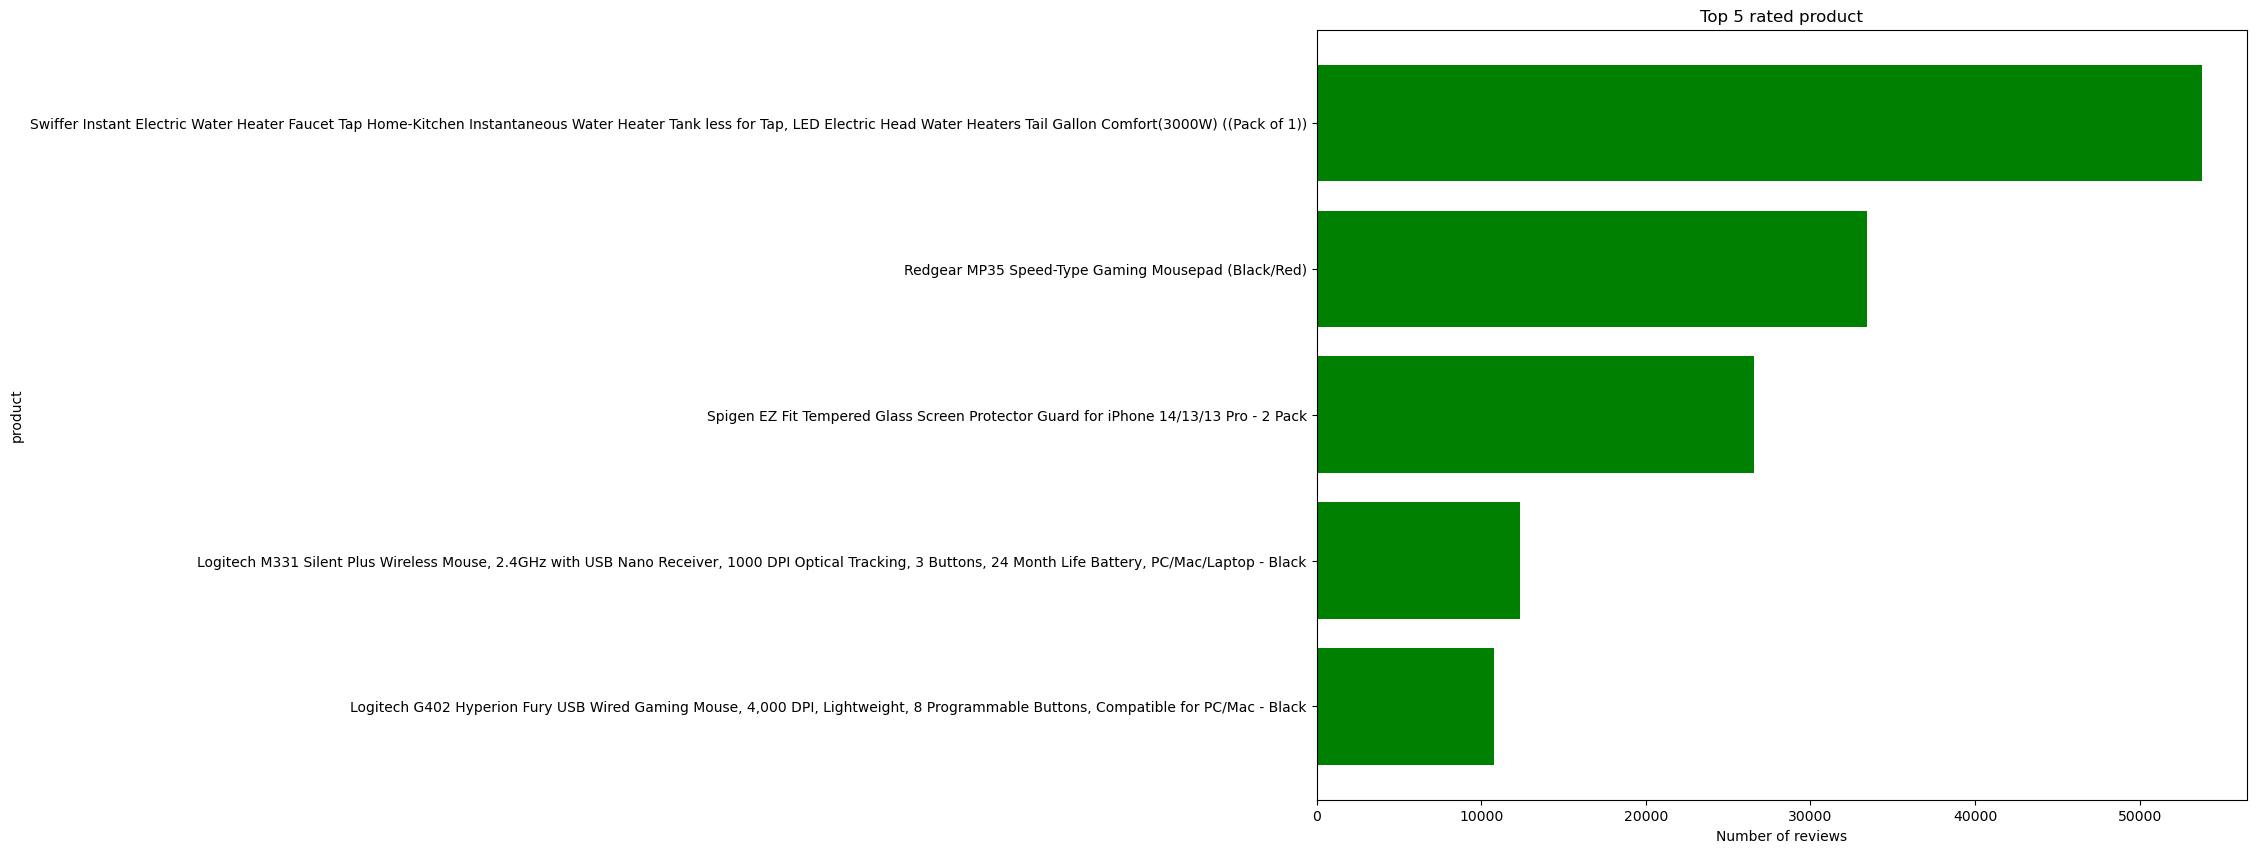

In [28]:
# Top 5 rated product
# Filter out rating_count <1000
df_best=df[df['rating_count']>10000] 

top_5 = df_best.sort_values(by=['rating','rating_count'], ascending = [False,False])[['product_name','rating','category','rating_count']].head(5)

# Display top5 and least5
display(top_5[['product_name', 'category', 'rating', 'rating_count']])

# Viszualizing Best rated
plt.figure(figsize=(12,10))
plt.barh(top_5['product_name'],top_5['rating_count'],color = 'green')
plt.xlabel('Number of reviews')
plt.ylabel('product')
plt.title('Top 5 rated product')
plt.gca().invert_yaxis()
plt.show


,product_name,rating,category,rating_count
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,0.0,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",992.0
1309,Khaitan ORFin Fan heater for Home and kitchen-...,2.0,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2.0
1243,"Personal Size Blender, Portable Blender, Batte...",2.3,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,13.0
1356,Green Tales Heat Seal Mini Food Sealer-Impulse...,2.6,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,24.0
545,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,2.8,Electronics|WearableTechnology|SmartWatches,87.0


<function matplotlib.pyplot.show(close=None, block=None)>

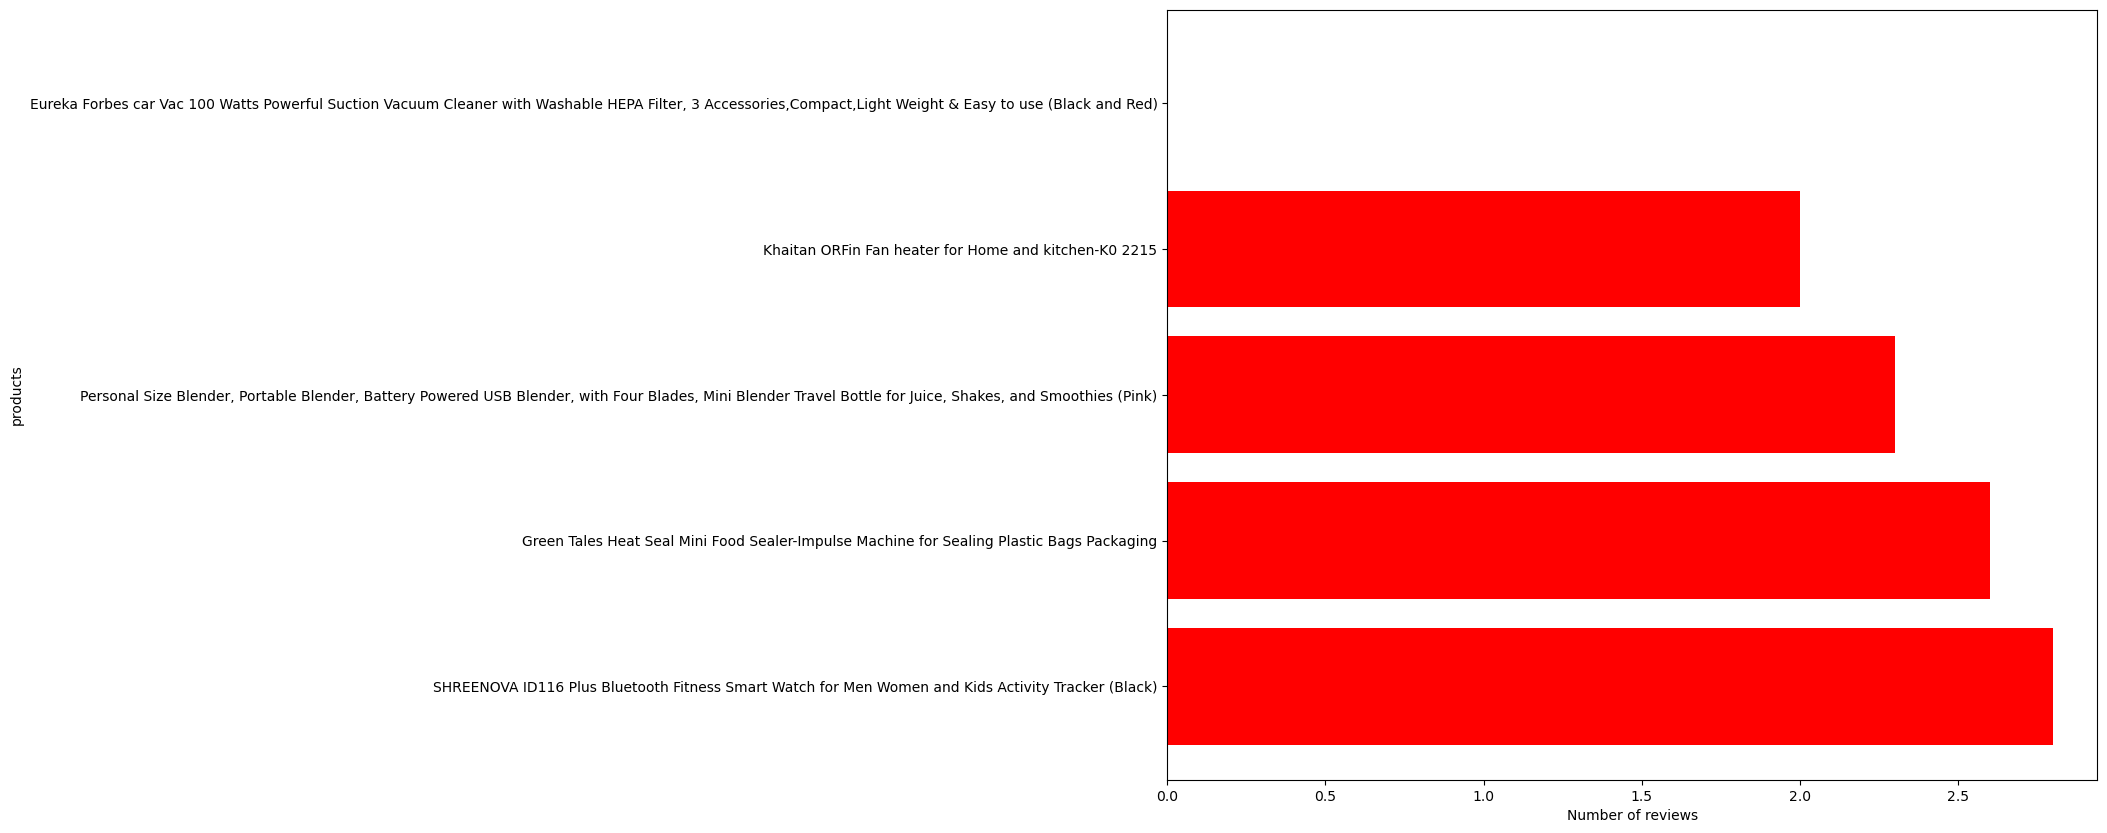

In [29]:
# Least rated product

least_5 = df.sort_values(by=['rating','rating_count'],ascending = [True,True])[['product_name','rating','category','rating_count']].head(5)

# Display  least5 rated product
display(least_5[['product_name','rating','category','rating_count']])

# Vizualizing least_5
plt.figure(figsize=(12,10))
plt.barh(least_5['product_name'],least_5['rating'], color ='red')
plt.xlabel('Number of reviews')
plt.ylabel('products')
plt.gca().invert_yaxis()
plt.show

### Price vs rating analysis

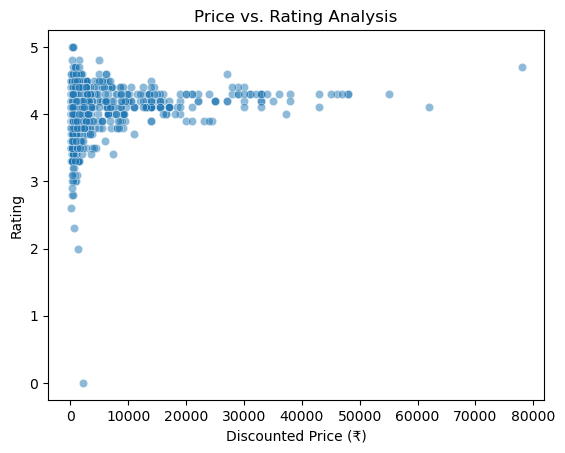

In [30]:
#relationship between price and rating
sns.scatterplot(x=df['discounted_price'],y=df['rating'], alpha =0.5)
plt.xlabel("Discounted Price (₹)")
plt.ylabel("Rating")
plt.title("Price vs. Rating Analysis")
plt.show()

Category-Wise Analysis

### discount vs rating analysis

<function matplotlib.pyplot.show(close=None, block=None)>

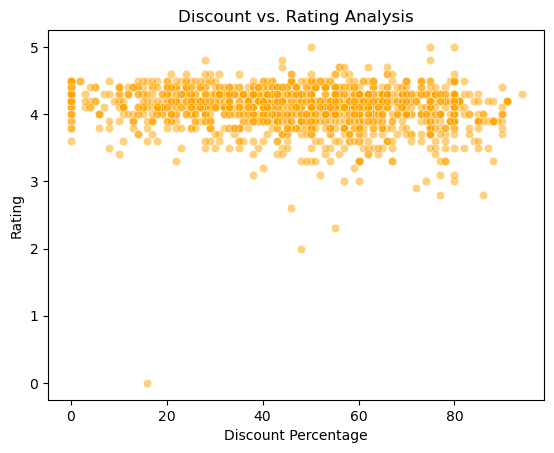

In [36]:
sns.scatterplot(x=df['discount_percentage'], y=df['rating'], alpha = 0.5, color ='orange')
plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
plt.title("Discount vs. Rating Analysis")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

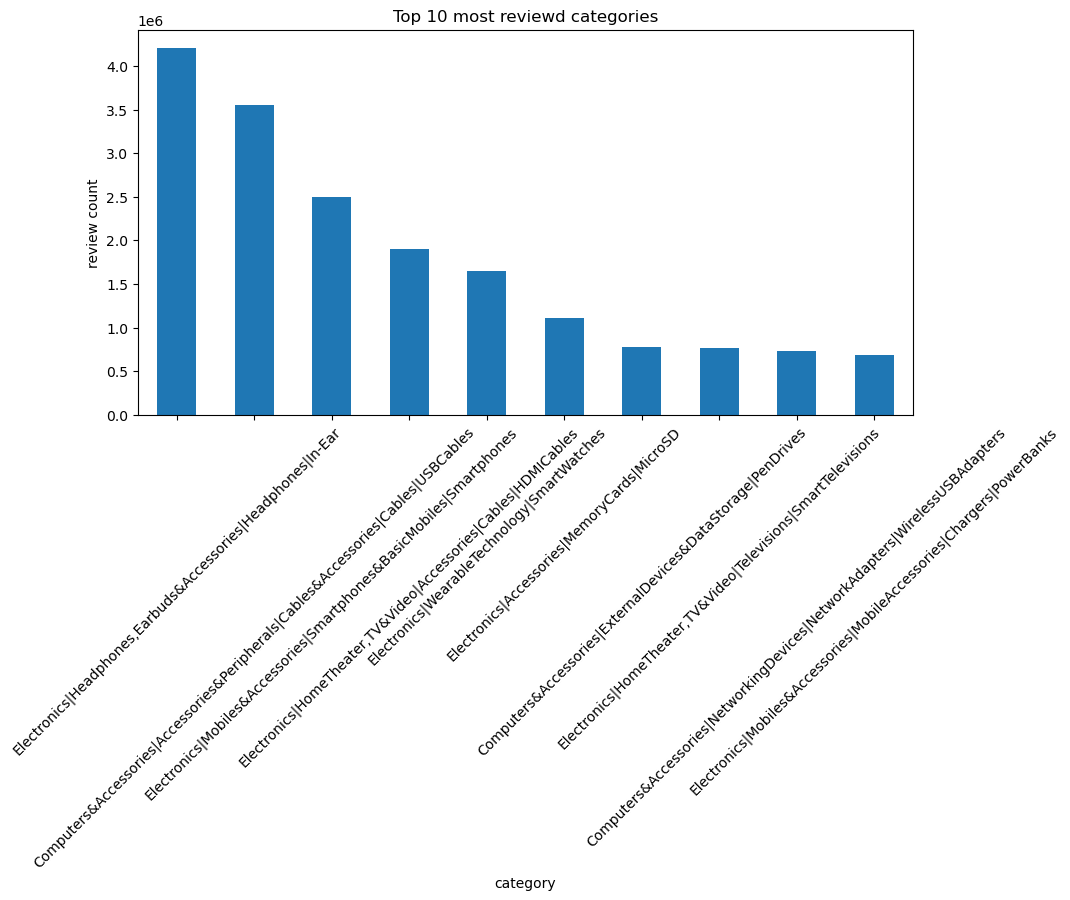

In [33]:
# Top 10 most reviewd categories
category_count = df.groupby('category')['rating_count'].sum().sort_values(ascending = False).head(10)

plt.figure(figsize =(10,5))
category_count.plot(kind = 'bar',title ='Top 10 most reviewd categories')
plt.xlabel('category')
plt.ylabel('review count')
plt.xticks(rotation = 45)
plt.show


###  Best Price Ranges for Highly Rated Products

In [39]:
df['discounted_price'].max()

77990.0

In [47]:
# What price range has the highest average rating?
df.groupby(pd.cut(df['discounted_price'], bins =[0, 500, 1000, 5000, 10000, 50000, 80000]),observed = False)['rating'].mean()

discounted_price
(0, 500]          4.074479
(500, 1000]       4.117063
(1000, 5000]      4.067981
(5000, 10000]     4.141667
(10000, 50000]    4.190756
(50000, 80000]    4.366667
Name: rating, dtype: float64

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [51]:
# Top 10 product based on review count
top_10 = df.sort_values(by='rating_count',ascending = False).head(10)
top_10[['product_name','rating_count']]

,product_name,rating_count
12,AmazonBasics Flexible Premium HDMI Cable (Blac...,426973.0
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...",426973.0
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...",426973.0
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,426972.0
400,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
352,boAt Bassheads 100 in Ear Wired Earphones with...,363713.0
584,boAt BassHeads 100 in-Ear Wired Headphones wit...,363711.0
370,"Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...",313836.0
371,"Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...",313836.0
473,"Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...",313832.0
